Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading in data

In [2]:
df = pd.read_csv("USUnemploymentClaims.csv")

In [3]:
df.head()

,Report Date,Claims,Change
0,12/28/2019,223000,-2000
1,1/4/2020,214000,-9000
2,1/11/2020,205000,-9000
3,1/18/2020,223000,18000
4,1/25/2020,217000,-6000


In [4]:
df

,Report Date,Claims,Change
0,12/28/2019,223000,-2000
1,1/4/2020,214000,-9000
2,1/11/2020,205000,-9000
3,1/18/2020,223000,18000
4,1/25/2020,217000,-6000
5,2/1/2020,203000,-14000
6,2/8/2020,206000,3000
7,2/15/2020,211000,5000
8,2/22/2020,219000,8000
9,2/29/2020,215000,-4000


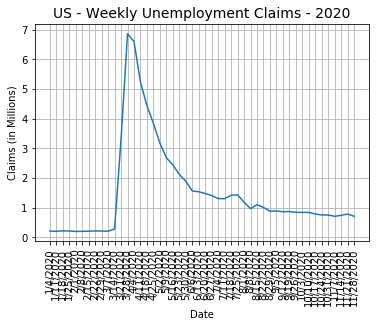

In [5]:
import matplotlib as mpl

#df['Report Date'] = df['Report Date'].str.slice(0, -5)
#print(df['Report Date'][0])

df['ClaimsMil'] = df['Claims']/1000000


plt.plot(df['Report Date'][1:],df['ClaimsMil'][1:])
plt.title("US - Weekly Unemployment Claims - 2020",fontsize=14)
plt.xlabel("Date")

plt.xticks(rotation=90)

plt.ylabel("Claims (in Millions)")
plt.grid()


Text(0, 0.5, 'Claims (in Millions)')

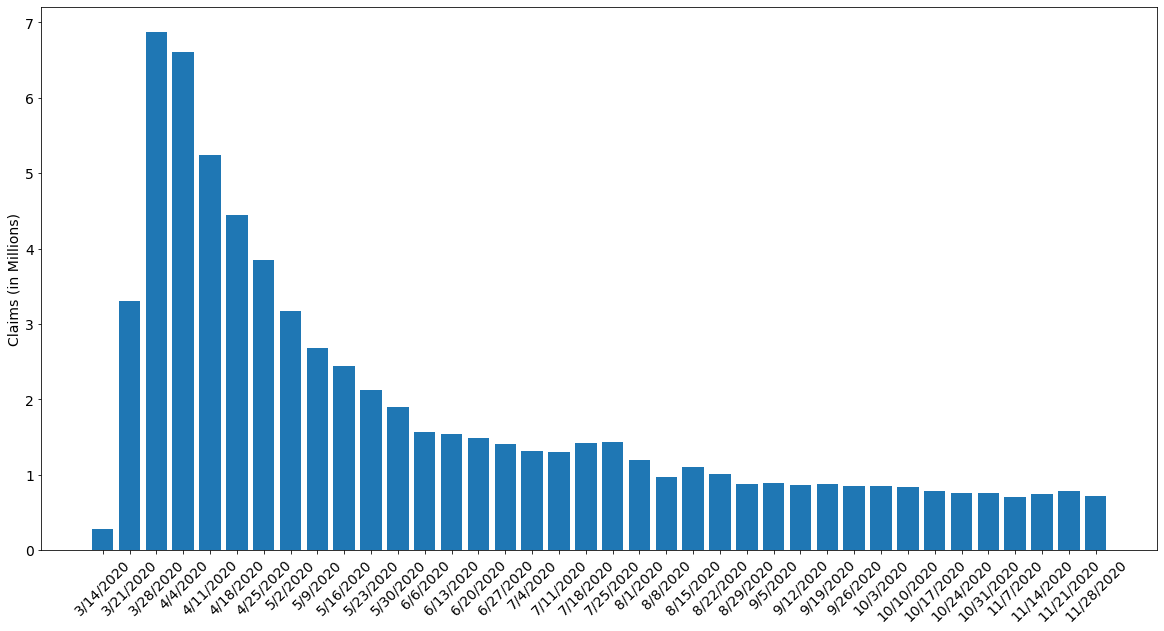

In [6]:
#df['Report Date'] = df['Report Date'].str.slice(0, -5)
#print(df['Report Date'][0])

df['ClaimsMil'] = df['Claims']/1000000

plt.figure(figsize=(20,10))

plt.bar(df['Report Date'][11:],df['ClaimsMil'][11:])
#plt.title("US - Weekly Unemployment Claims - 2020",fontsize=14)
#plt.xlabel("Date")

#labels = ['MAR 21', 'MAR 28', 'APR 4', 'APR 11', 'APR 18', 'APR 25', 'MAY 2', 'MAY 9','MAY 16','MAY 23','MAY 30','JUN 6','JUN 13','JUN 20']
#plt.xticks(range(len(labels)), labels)
plt.xticks(rotation=45)
plt.xticks(fontsize=14)

plt.yticks(fontsize=14)
plt.ylabel("Claims (in Millions)", fontsize=14)


13    6867000
14    6606000
15    5237000
16    4442000
17    3846000
18    3176000
19    2687000
20    2446000
21    2126000
22    1897000
23    1566000
24    1540000
25    1482000
26    1413000
27    1310000
28    1307000
29    1422000
30    1435000
31    1191000
32     971000
33    1104000
34    1011000
35     884100
36     893000
37     866000
38     873000
39     849000
40     845000
41     842000
42     791000
43     758000
44     757000
45     711000
46     748000
47     787000
48     712000
Name: Claims, dtype: int64
Root Mean Square Error: 512547.933650869
R-Square: 0.897216510504379
Coefficients: [      0.         -419619.85012213    8484.04168211]
Intercept: 5673931.780464681


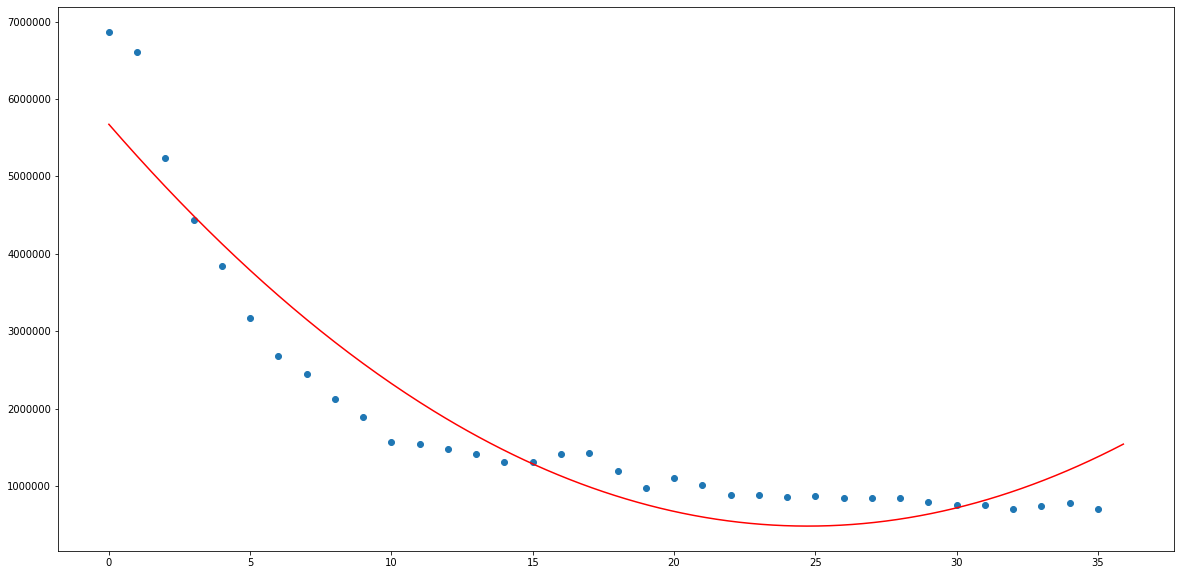

In [7]:
import operator

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(20,10))

startFrom = 13

df['Report Date'][startFrom:]

#plt.scatter(df['Report Date'][13:],df['Claims'][13:])

x = np.arange(0,len(df)-startFrom)
y = df['Claims'][startFrom:]


dfX = pd.DataFrame(x, columns=['time']) 

print(y)

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(dfX)

model = LinearRegression()
model.fit(x_poly,y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("Root Mean Square Error:",rmse)
print("R-Square:",r2)

print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)

plt.scatter(x,y)
XX = np.arange(0, len(x), 0.1)
poly_func = model.intercept_ + model.coef_[1]*XX + model.coef_[2]*np.power(XX,2)
plt.plot(XX, poly_func, color='r',label="y=-0.24x^2+3.38x-0.26")

Text(0, 0.5, 'Claims')

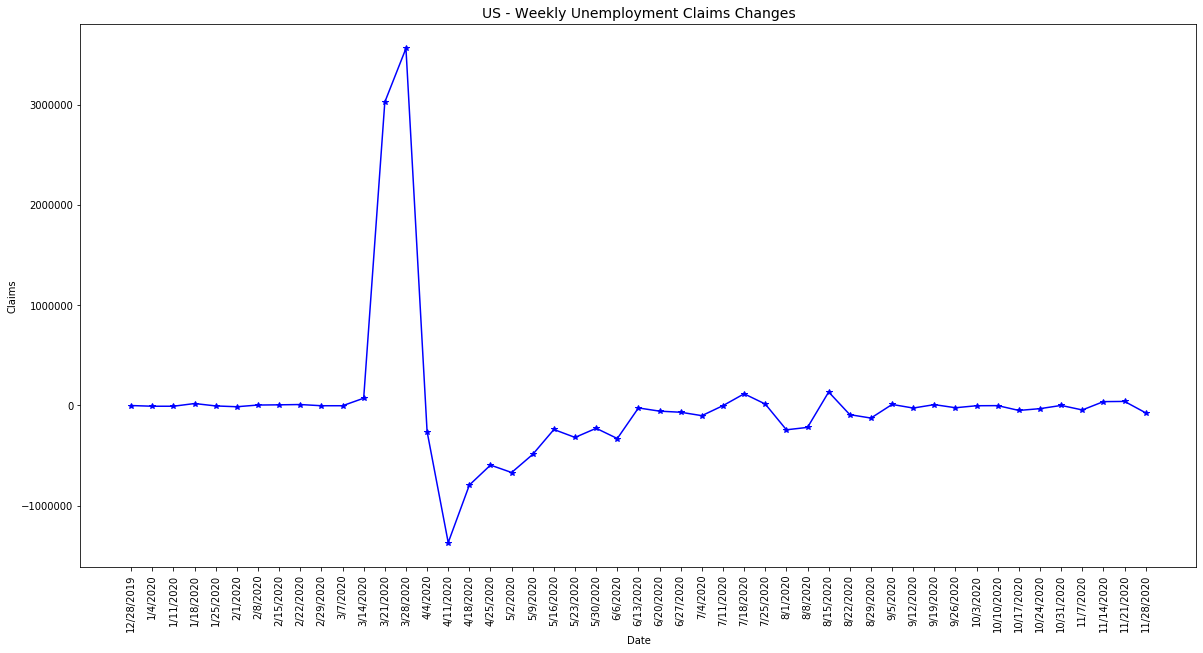

In [8]:
plt.figure(figsize=(20,10))
plt.plot(df['Report Date'],df['Change'],'*-b')
plt.title("US - Weekly Unemployment Claims Changes",fontsize=14)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Claims")

In [9]:
percentage = [0]
for i in range(1,len(df),1):
#for i in range(1,5,1):
    j = i-1
    delta = (df['Claims'][i]-df['Claims'][j])/(df['Claims'][j])
    delta = round(delta * 100,2)
    #print(round(delta,2))
    percentage.append(delta)
    
df['Percentage'] = percentage

df

,Report Date,Claims,Change,ClaimsMil,Percentage
0,12/28/2019,223000,-2000,0.2230,0.00
1,1/4/2020,214000,-9000,0.2140,-4.04
2,1/11/2020,205000,-9000,0.2050,-4.21
3,1/18/2020,223000,18000,0.2230,8.78
4,1/25/2020,217000,-6000,0.2170,-2.69
5,2/1/2020,203000,-14000,0.2030,-6.45
6,2/8/2020,206000,3000,0.2060,1.48
7,2/15/2020,211000,5000,0.2110,2.43
8,2/22/2020,219000,8000,0.2190,3.79
9,2/29/2020,215000,-4000,0.2150,-1.83


Text(0, 0.5, 'Percentage(%)')

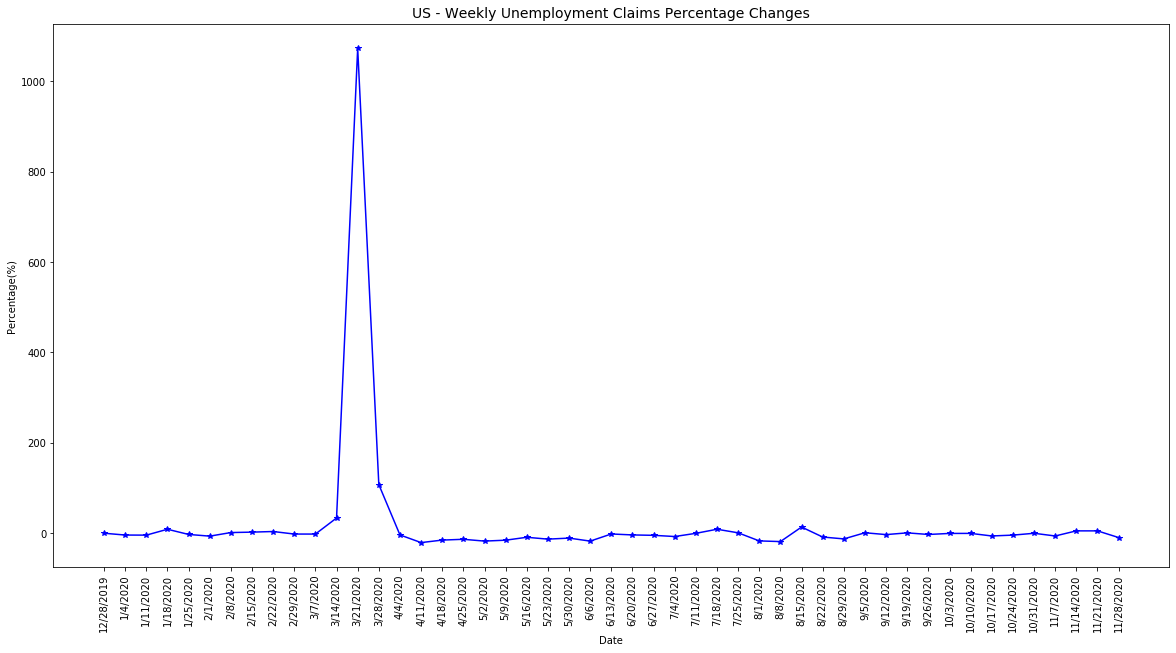

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df['Report Date'],df['Percentage'],'*-b')
plt.title("US - Weekly Unemployment Claims Percentage Changes",fontsize=14)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Percentage(%)")

In [11]:
totalClaimsCovid19 = df['Claims'][11:].sum()
print("Total unemployment claims since COVID-19 outbreak and Shelter in Place in mid-March: {:,}".format(totalClaimsCovid19))

Total unemployment claims since COVID-19 outbreak and Shelter in Place in mid-March: 69,987,100


In [12]:
running_total = []
running_total_dates = []
for i in range(len(df)+1):
    #print(i)
    if df['Claims'][2:i].sum() != 0:
        running_total.append(df['Claims'][2:i].sum())
        running_total_dates.append(df['Report Date'][i-1])
    
print(running_total)
print(len(running_total))
print(df['Claims'][0:1].sum())


[205000, 428000, 645000, 848000, 1054000, 1265000, 1484000, 1699000, 1910000, 2192000, 5499000, 12366000, 18972000, 24209000, 28651000, 32497000, 35673000, 38360000, 40806000, 42932000, 44829000, 46395000, 47935000, 49417000, 50830000, 52140000, 53447000, 54869000, 56304000, 57495000, 58466000, 59570000, 60581000, 61465100, 62358100, 63224100, 64097100, 64946100, 65791100, 66633100, 67424100, 68182100, 68939100, 69650100, 70398100, 71185100, 71897100]
47
223000


In [13]:
df_running_total = pd.DataFrame({'Claims':running_total,'Dates':running_total_dates})
df_running_total

,Claims,Dates
0,205000,1/11/2020
1,428000,1/18/2020
2,645000,1/25/2020
3,848000,2/1/2020
4,1054000,2/8/2020
5,1265000,2/15/2020
6,1484000,2/22/2020
7,1699000,2/29/2020
8,1910000,3/7/2020
9,2192000,3/14/2020


Text(0, 0.5, 'Claims (in Millions)')

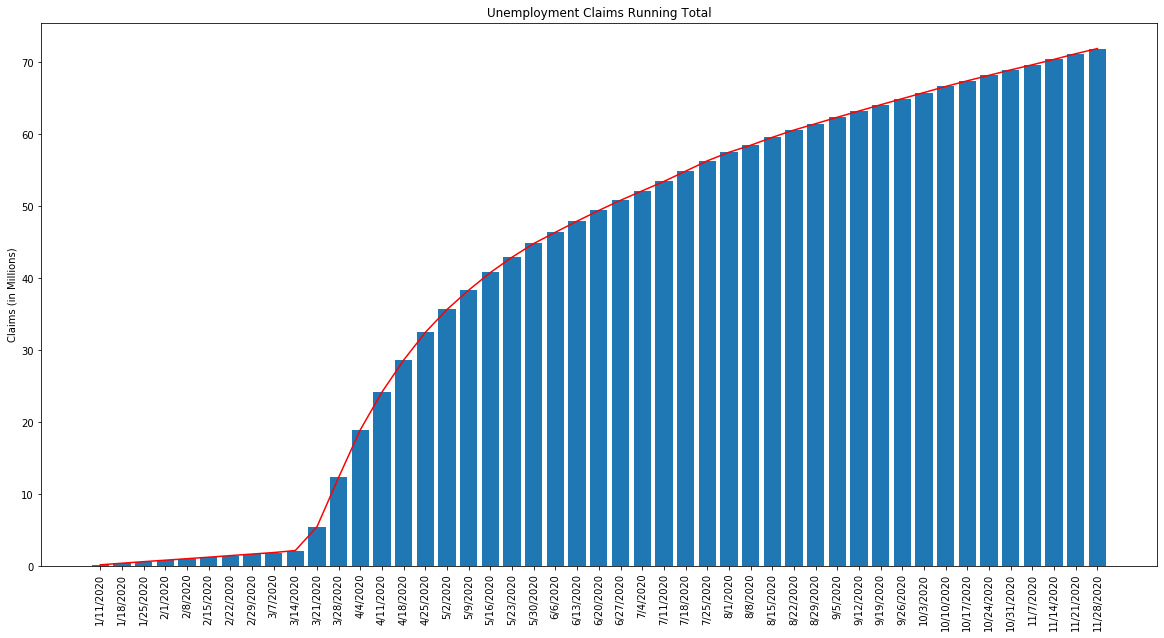

In [14]:
start = 0
plt.figure(figsize=(20,10))
plt.bar(df_running_total['Dates'][start:],(df_running_total['Claims'][start:]/1000000))
plt.plot(df_running_total['Dates'][start:],(df_running_total['Claims'][start:]/1000000),color='r')
plt.title("Unemployment Claims Running Total")
plt.xticks(rotation=90)
plt.ylabel("Claims (in Millions)")